# Anime Data Analysis
___
___

Produced Dashboard   : [Here](https://lookerstudio.google.com/embed/reporting/421ffd06-04e7-4469-9483-836482c1d900/page/2QyMD)

Presentation Slides  : [Here](https://www.canva.com/design/DAFh8vWGsWc/QcN9lKDp42Tu8B3eB_kPcw/view?utm_content=DAFh8vWGsWc&utm_campaign=designshare&utm_medium=link2&utm_source=uniquelinks&utlId=h2775c50ffe)

---
---

# 1. Identifikasi Masalah

## Latar Belakang
Popularitas anime terus meningkat sepanjang tahun. Platform streaming Marinobar ingin memanfaatkan popularitas anime untuk meningkatkan jumlah subscribernya. Oleh karena itu sebagai Data Analyst saya diminta untuk melakukan analisis data anime untuk memberi wawasan mengenai anime sekaligus rekomendasi anime apa yang cocok untuk ditayangkan pada platform tersebut.

## Problem Statement
Menganalisis data anime untuk memberikan wawasan mengenai tren anime serta rekomendasi konten anime yang cocok untuk ditayangkan di platform, dengan tujuan meningkatkan jumlah subscriber Marinobar, dalam jangka waktu yang realistis

## Poin Penjabaran

1. Bagaimana trend anime dari tahun ke tahun
2. Anime apa saja yang populer dan memiliki rating terbaik
3. Studio apa saja yang menghasilkan anime terpopuler dan berkualitas
4. Tema dan tag anime apa yang paling banyak
5. Bagaimana central tendency data anime untuk tiap demografi
6. Apakah ada perbedaan rating dari tiap demografi.

---

# 2. Import Library

Library yang digunakan dalam assignment ini

In [1]:
# Import library
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

---

# 3. Data Loading

Dataset yang digunakan pada project ini adalah dataset tentang anime dari berbagai genre secara detail yang tersedia di myanimelist. Dataset ini diunduh dari website kaggle. 

URL dataset : https://www.kaggle.com/datasets/pmanthan/anime-list-2022?select=anime-list+4-sept-2022+update.csv

Data tersebut kemudian dimasukan sebagai DataFrame dengan `.read_csv`

In [2]:
# Memasukan dataframe
df = pd.read_csv('anime-list 4-sept-2022 update.csv')

Lima data teratas dan terbawah dapat dilihat dengan `.head()` dan `.tail()`.

In [3]:
# Menampilkan data teratas
df.head()

,Unnamed: 0,name,studio,theme,tags,source,rating,year,synopsis,demographic,status,eps,eps_avg_duration_in_min,rated_by
0,0,Shingeki no Kyojin,Wit Studio,"Gore, Military, Survival","Action, Drama",Manga,8.53,2013.0,"Centuries ago, mankind was slaughtered to near...",Shounen,Finished,25.0,24.0,3.5M
1,1,Death Note,Madhouse,Psychological,"Supernatural, Suspense",Manga,8.62,2006.0,"Brutal murders, petty thefts, and senseless vi...",Shounen,Finished,37.0,23.0,3.5M
2,2,Fullmetal Alchemist: Brotherhood,Bones,Military,"Action, Adventure, Drama, Fantasy",Manga,9.13,2009.0,After a horrific alchemy experiment goes wrong...,Shounen,Finished,64.0,24.0,3.0M
3,3,Boku no Hero Academia,Bones,"School, Super Power",Action,Manga,7.92,2016.0,"The appearance of ""quirks,"" newly discovered s...",Shounen,Finished,13.0,24.0,2.7M
4,4,Naruto,Pierrot,Martial Arts,"Action, Adventure, Fantasy",Manga,7.97,2002.0,"Moments prior to Naruto Uzumaki's birth, a hug...",Shounen,Finished,220.0,23.0,2.5M


In [4]:
# Menampilkan data terbawah
df.tail()

,Unnamed: 0,name,studio,theme,tags,source,rating,year,synopsis,demographic,status,eps,eps_avg_duration_in_min,rated_by
3163,3163,Jiutian Qi Yuan,Unknown,Kids,"Adventure, Fantasy",Original,NaN,2012.0,NaN,Kids,Finished,26.0,13.0,15
3164,3164,Kaka He Ta De Pengyoumen,Unknown,Kids,Fantasy,Original,NaN,2010.0,NaN,Kids,Finished,104.0,10.0,15
3165,3165,Kangri Xiao Qibing,Unknown,"Historical, Military",NaN,NaN,NaN,2006.0,NaN,Kids,Finished,26.0,12.0,15
3166,3166,Shenqi De Baoshi,Unknown,Anthropomorphic,Fantasy,Original,NaN,2011.0,NaN,Kids,Finished,300.0,5.0,15
3167,3167,Shucai Wangguo,Unknown,Anthropomorphic,"Adventure, Fantasy",Original,NaN,2014.0,NaN,Kids,Finished,32.0,12.0,15


In [5]:
df.shape

(3168, 14)

Terdapat 3168 data dalam 14 kolom

---

# 4. Data Cleaning

Data yang bersih akan meningkatkan produktivitas secara keseluruhan dan memungkinkan pengambilan informasi berkualitas untuk eksplorasi data. Oleh karena itu, dilakukan data cleaning. Sebelum data cleaning dilakukan, salinan data dibuat dengan `.copy()` agar data awal tidak rusak jika suatu saat ingin kembali.

In [6]:
# Membuat copy dataframe dan diberi nama anime
anime = df.copy()

## Pemeriksaan Data

Data diperiksa tipe value pada setiap variabelnya, lalu diubah menjadi tipe yang dapat diproses.

In [7]:
# Memeriksa jenis data
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3168 non-null   int64  
 1   name                     3168 non-null   object 
 2   studio                   3168 non-null   object 
 3   theme                    3168 non-null   object 
 4   tags                     2595 non-null   object 
 5   source                   2659 non-null   object 
 6   rating                   1839 non-null   float64
 7   year                     3121 non-null   float64
 8   synopsis                 2358 non-null   object 
 9   demographic              3168 non-null   object 
 10  status                   3144 non-null   object 
 11  eps                      3047 non-null   float64
 12  eps_avg_duration_in_min  3102 non-null   float64
 13  rated_by                 3168 non-null   object 
dtypes: float64(4), int64(1),

Kolom `Unnamed: 0`, `synopsis`, dan `status` tidak dibutuhkan dan akan di drop. Tipe data pada kolom `year` dan `rated_by` akan diubah menjadi integer.

In [8]:
# Drop kolom
anime.drop(columns=['Unnamed: 0', 'synopsis'], inplace=True)
anime.head()

,name,studio,theme,tags,source,rating,year,demographic,status,eps,eps_avg_duration_in_min,rated_by
0,Shingeki no Kyojin,Wit Studio,"Gore, Military, Survival","Action, Drama",Manga,8.53,2013.0,Shounen,Finished,25.0,24.0,3.5M
1,Death Note,Madhouse,Psychological,"Supernatural, Suspense",Manga,8.62,2006.0,Shounen,Finished,37.0,23.0,3.5M
2,Fullmetal Alchemist: Brotherhood,Bones,Military,"Action, Adventure, Drama, Fantasy",Manga,9.13,2009.0,Shounen,Finished,64.0,24.0,3.0M
3,Boku no Hero Academia,Bones,"School, Super Power",Action,Manga,7.92,2016.0,Shounen,Finished,13.0,24.0,2.7M
4,Naruto,Pierrot,Martial Arts,"Action, Adventure, Fantasy",Manga,7.97,2002.0,Shounen,Finished,220.0,23.0,2.5M


In [9]:
# Ubah kolom year menjadi integer
anime['year'] = anime['year'].astype(dtype= 'Int64')

In [10]:
# Ubah kolom rated_by menjadi Integer
# Mengubah 'K' dan 'M' menjadi perkalian 1000 dan perkalian 1000000
anime['rated_by'] = (anime.rated_by.replace(r'[KM]+$', '', regex=True).astype(float) * \
                     anime.rated_by.str.extract(r'[\d\.]+([KM]+)', expand=False)
                     .fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))

# Mengubah tipe data float menjadi integer
anime['rated_by'] = anime['rated_by'].astype(dtype= 'Int64')


In [11]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     3168 non-null   object 
 1   studio                   3168 non-null   object 
 2   theme                    3168 non-null   object 
 3   tags                     2595 non-null   object 
 4   source                   2659 non-null   object 
 5   rating                   1839 non-null   float64
 6   year                     3121 non-null   Int64  
 7   demographic              3168 non-null   object 
 8   status                   3144 non-null   object 
 9   eps                      3047 non-null   float64
 10  eps_avg_duration_in_min  3102 non-null   float64
 11  rated_by                 3168 non-null   Int64  
dtypes: Int64(2), float64(3), object(7)
memory usage: 303.3+ KB


Tipe data sudah sesuai untuk diproses.

## Pemotongan Data

Data yang dibutuhkan hanyalah anime yang populer. Parameter popularitas dapat dihitung dari jumlah rating pada kolom `rated_by`. Batas data yang akan digunakan hanya data yang memiliki jumlah rating diatas 10000.

In [12]:
# Slicing data dengan jumlah rating > 10000
anime = anime[anime['rated_by'] >= 10000]

In [13]:
anime

,name,studio,theme,tags,source,rating,year,demographic,status,eps,eps_avg_duration_in_min,rated_by
0,Shingeki no Kyojin,Wit Studio,"Gore, Military, Survival","Action, Drama",Manga,8.53,2013,Shounen,Finished,25.0,24.0,3500000
1,Death Note,Madhouse,Psychological,"Supernatural, Suspense",Manga,8.62,2006,Shounen,Finished,37.0,23.0,3500000
2,Fullmetal Alchemist: Brotherhood,Bones,Military,"Action, Adventure, Drama, Fantasy",Manga,9.13,2009,Shounen,Finished,64.0,24.0,3000000
3,Boku no Hero Academia,Bones,"School, Super Power",Action,Manga,7.92,2016,Shounen,Finished,13.0,24.0,2700000
4,Naruto,Pierrot,Martial Arts,"Action, Adventure, Fantasy",Manga,7.97,2002,Shounen,Finished,220.0,23.0,2500000
...,...,...,...,...,...,...,...,...,...,...,...,...
1689,B-Legend! Battle B-Daman,Nippon Animation,Strategy Game,"Adventure, Fantasy",Manga,6.28,2004,Kids,Finished,52.0,22.0,13000
1690,Beyblade Burst Chouzetsu,OLM,Kids,"Action, Adventure, Sci-Fi, Sports",Manga,6.45,2018,Kids,Finished,51.0,24.0,12000
1691,Gudetama,Gathering,Kids,"Comedy, Gourmet",Original,7.03,2014,Kids,Airing,NaN,1.0,11000
1692,Furusato Saisei: Nippon no Mukashibanashi,Tomason,Historical,Supernatural,Other,6.97,2012,Kids,Finished,258.0,24.0,10000


Tersisa  1248 data dalam 11 kolom.

## Missing Value

Jumlah missing value diperiksa terlebih dahulu

In [14]:
# Memeriksa jumlah missing value
anime.isnull().sum()

name                        0
studio                      0
theme                       0
tags                       12
source                      2
rating                     31
year                        9
demographic                 0
status                      9
eps                        40
eps_avg_duration_in_min    28
rated_by                    0
dtype: int64

Terdapat missing values pada kolom `tags`, `source`, `rating`, `year`, `eps`, dan `eps_avg_duration_in_min`.

In [15]:
# Cek data status
anime.status.unique()

array(['Finished', 'Airing', 'Not', nan], dtype=object)

In [16]:
# Periksa data status = nan
anime.loc[anime['status'].isna()]

,name,studio,theme,tags,source,rating,year,demographic,status,eps,eps_avg_duration_in_min,rated_by
342,Kimetsu no Yaiba: Katanakaji no Sato-hen,ufotable,Historical,"Action, Fantasy",Manga,NaN,<NA>,Shounen,NaN,NaN,NaN,103000
345,Tonikaku Kawaii 2nd Season,Unknown,Shounen,"Comedy, Romance",Manga,NaN,<NA>,Shounen,NaN,NaN,NaN,98000
415,Jigokuraku,MAPPA,Historical,NaN,Manga,NaN,<NA>,Shounen,NaN,NaN,NaN,60000
420,Fairy Tail: 100 Years Quest,Unknown,Shounen,"Action, Adventure, Fantasy",Manga,NaN,<NA>,Shounen,NaN,NaN,NaN,56000
435,Enen no Shouboutai: San no Shou,David Production,Shounen,"Action, Supernatural",Manga,NaN,<NA>,Shounen,NaN,NaN,NaN,52000
466,Masamune-kun no Revenge R,SILVER LINK.,"Harem, School","Comedy, Romance",Manga,NaN,<NA>,Shounen,NaN,NaN,NaN,40000
579,Nanatsu no Taizai: Mokushiroku no Yonkishi,Unknown,Shounen,"Action, Adventure, Fantasy",Manga,NaN,<NA>,Shounen,NaN,NaN,NaN,16000
1161,One Punch Man 3,Unknown,"Parody, Super Power","Action, Comedy",Manga,NaN,<NA>,Seinen,NaN,NaN,NaN,33000
1182,"""Oshi no Ko""",Doga Kobo,"Music, Reincarnation","Drama, Supernatural",Manga,NaN,<NA>,Seinen,NaN,NaN,NaN,21000


Setelah dilakukan pencarian data missing value pada status merupakan anime yang belum tayang.

In [17]:
# periksa data status = Not
anime[anime.status == "Not"].head()

,name,studio,theme,tags,source,rating,year,demographic,status,eps,eps_avg_duration_in_min,rated_by
123,Chainsaw Man,MAPPA,Gore,"Action, Adventure",Manga,NaN,2022,Shounen,Not,NaN,NaN,482000
231,Boku no Hero Academia 6th Season,Bones,"School, Super Power",Action,Manga,NaN,2022,Shounen,Not,NaN,NaN,211000
239,Spy x Family Part 2,CloverWorks,Childcare,"Action, Comedy",Manga,NaN,2022,Shounen,Not,NaN,13.0,198000
254,Shingeki no Kyojin: The Final Season - Kankets...,MAPPA,"Gore, Military, Survival","Action, Drama",Manga,NaN,2023,Shounen,Not,NaN,NaN,178000
283,Bleach: Sennen Kessen-hen,Pierrot,Shounen,"Action, Adventure, Fantasy",Manga,NaN,2022,Shounen,Not,NaN,NaN,147000


Setelah dilakukan pencarian data `Not` pada `status` merupakan anime yang belum tayang. Maka missing value dan data Not akan diubah menjadi `Not Aired`. 

In [18]:
# cek data source
anime.groupby(['source'])['source'].count()

source
4-koma manga     48
Book              3
Card game         5
Game             43
Light novel      29
Manga           960
Mixed media       3
Novel            11
Original         99
Other             7
Picture book      1
Visual novel     30
Web manga         7
Name: source, dtype: int64

Missing value pada `source` dapat diisi dengan `Other`.

In [19]:
# Cek data tags
anime.groupby(['tags'])['tags'].count().sort_values(ascending=False)

tags
Comedy                                                   63
Comedy, Slice, of, Life                                  58
Comedy, Romance                                          52
Sports                                                   44
Action, Fantasy                                          28
                                                         ..
Action, Comedy, Sci-Fi, Supernatural                      1
Comedy, Drama, Slice, of, Life, Supernatural              1
Action, Comedy, Sci-Fi, Sports                            1
Action, Comedy, Sci-Fi, Slice, of, Life                   1
Action, Comedy, Fantasy, Romance, Supernatural, Ecchi     1
Name: tags, Length: 313, dtype: int64

In [20]:
# missing value pada status diisi dengan value 'Not Aired'
anime['status'].fillna('Not Aired', inplace=True)
# Value Not pada status diubah menjadi Not Aired
anime['status'].replace('Not', 'Not Aired', inplace=True)

In [21]:
# missing value pada source diisi dengan value 'Other'
anime['source'].fillna('Other', inplace=True)

In [22]:
# missing value pada tags diisi dengan value 'None'
anime['tags'].fillna('None', inplace=True)

In [23]:
# Periksa missing value pada year
anime.loc[anime['year'].isna()]

,name,studio,theme,tags,source,rating,year,demographic,status,eps,eps_avg_duration_in_min,rated_by
342,Kimetsu no Yaiba: Katanakaji no Sato-hen,ufotable,Historical,"Action, Fantasy",Manga,NaN,<NA>,Shounen,Not Aired,NaN,NaN,103000
345,Tonikaku Kawaii 2nd Season,Unknown,Shounen,"Comedy, Romance",Manga,NaN,<NA>,Shounen,Not Aired,NaN,NaN,98000
415,Jigokuraku,MAPPA,Historical,None,Manga,NaN,<NA>,Shounen,Not Aired,NaN,NaN,60000
420,Fairy Tail: 100 Years Quest,Unknown,Shounen,"Action, Adventure, Fantasy",Manga,NaN,<NA>,Shounen,Not Aired,NaN,NaN,56000
435,Enen no Shouboutai: San no Shou,David Production,Shounen,"Action, Supernatural",Manga,NaN,<NA>,Shounen,Not Aired,NaN,NaN,52000
466,Masamune-kun no Revenge R,SILVER LINK.,"Harem, School","Comedy, Romance",Manga,NaN,<NA>,Shounen,Not Aired,NaN,NaN,40000
579,Nanatsu no Taizai: Mokushiroku no Yonkishi,Unknown,Shounen,"Action, Adventure, Fantasy",Manga,NaN,<NA>,Shounen,Not Aired,NaN,NaN,16000
1161,One Punch Man 3,Unknown,"Parody, Super Power","Action, Comedy",Manga,NaN,<NA>,Seinen,Not Aired,NaN,NaN,33000
1182,"""Oshi no Ko""",Doga Kobo,"Music, Reincarnation","Drama, Supernatural",Manga,NaN,<NA>,Seinen,Not Aired,NaN,NaN,21000


Setelah dilakukan pencarian ternyata missing value pada kolom `year` adalah anime yang belum rilis. Maka missing value akan diisi dengan value `2023`.

In [24]:
# missing value pada year diisi dengan value '2023'
anime['year'].fillna(2023, inplace=True)

In [25]:
# Periksa sebaran data rating, eps, dan eps_avg_duration_in_min
print('skewness rating : ', anime['rating'].skew())
print('skewness spisode : ', anime['eps'].skew())
print('skewness duration : ', anime['eps_avg_duration_in_min'].skew())

skewness rating :  -0.3623392677379087
skewness spisode :  18.36460528180625
skewness duration :  -3.2459270461974676


Dari nilai skewness dapat dilihat sebaran data `rating` cenderung normal sedangkan sebaran data `eps` dan `eps_avg_duration_in_min` tidak normal. Maka missing value `rating` akan diisi dengan mean sedangkan `eps` dan `eps_avg_duration_in_min` disi dengan median.

In [26]:
# mencari nilai mean dan median untuk diisikan sebagai missing value
print('mean rating : ', anime['rating'].mean())
print('median eps : ', anime['eps'].median())
print('median duration : ', anime['eps_avg_duration_in_min'].median())

mean rating :  7.345973705834018
median eps :  13.0
median duration :  24.0


In [27]:
# Mengisi value ke missing value
anime['rating'].fillna(7.35, inplace=True)
anime['eps'].fillna(13.0, inplace=True)
anime['eps_avg_duration_in_min'].fillna(24.0, inplace=True)

In [28]:
# Periksa kembali missing value
anime.isnull().sum()

name                       0
studio                     0
theme                      0
tags                       0
source                     0
rating                     0
year                       0
demographic                0
status                     0
eps                        0
eps_avg_duration_in_min    0
rated_by                   0
dtype: int64

In [29]:
anime

,name,studio,theme,tags,source,rating,year,demographic,status,eps,eps_avg_duration_in_min,rated_by
0,Shingeki no Kyojin,Wit Studio,"Gore, Military, Survival","Action, Drama",Manga,8.53,2013,Shounen,Finished,25.0,24.0,3500000
1,Death Note,Madhouse,Psychological,"Supernatural, Suspense",Manga,8.62,2006,Shounen,Finished,37.0,23.0,3500000
2,Fullmetal Alchemist: Brotherhood,Bones,Military,"Action, Adventure, Drama, Fantasy",Manga,9.13,2009,Shounen,Finished,64.0,24.0,3000000
3,Boku no Hero Academia,Bones,"School, Super Power",Action,Manga,7.92,2016,Shounen,Finished,13.0,24.0,2700000
4,Naruto,Pierrot,Martial Arts,"Action, Adventure, Fantasy",Manga,7.97,2002,Shounen,Finished,220.0,23.0,2500000
...,...,...,...,...,...,...,...,...,...,...,...,...
1689,B-Legend! Battle B-Daman,Nippon Animation,Strategy Game,"Adventure, Fantasy",Manga,6.28,2004,Kids,Finished,52.0,22.0,13000
1690,Beyblade Burst Chouzetsu,OLM,Kids,"Action, Adventure, Sci-Fi, Sports",Manga,6.45,2018,Kids,Finished,51.0,24.0,12000
1691,Gudetama,Gathering,Kids,"Comedy, Gourmet",Original,7.03,2014,Kids,Airing,13.0,1.0,11000
1692,Furusato Saisei: Nippon no Mukashibanashi,Tomason,Historical,Supernatural,Other,6.97,2012,Kids,Finished,258.0,24.0,10000


In [30]:
# Ekspoprt clean data ke csv
anime.to_csv('clean_anime_data.csv', index=False)

Sudah tidak ada missing value. Data sudah bisa dieksplorasi.

---

# 5. Eksplorasi Data

## 1. Jumlah anime dari tahun ke tahun

Perkembangan jumlah anime diperiksa dari tahun ke tahun untuk melihat apakah produksi anime terus meningkat atau menurun.

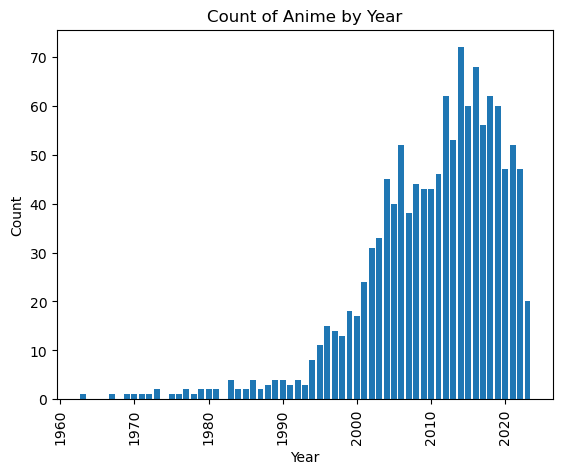

In [31]:
# Group anime berdasarkan tahun
anime_count_year = anime.groupby(['year'])['name'].count()

# Plot bar
plt.bar(anime_count_year.index, anime_count_year.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Anime by Year')
plt.xticks(rotation=90)
plt.show()

Dapat dilihat sebaran jumlah anime setiap tahun dari tahun 1963 samapai 2022 dan 2023 (belum release). Jumlah anime terlihat terus berkembang sampai puncak pada tahun 2014, setelah itu trend terlihat menurun sampai 2022. Mari dilihat dari segi popularitas apakah trendnya sama dengan jumlah anime.

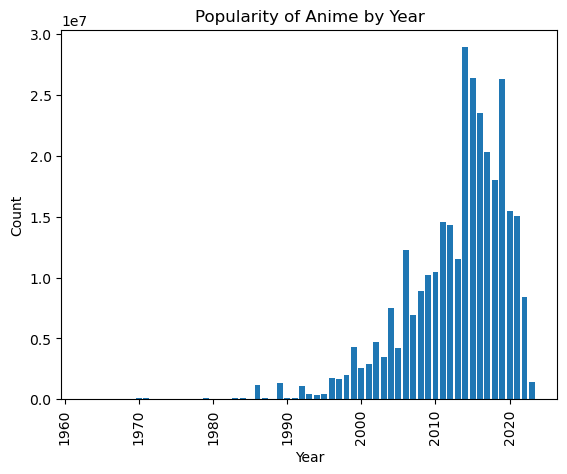

In [32]:
anime_popularity_year = anime.groupby(['year'])['rated_by'].sum()

# Plot bar
plt.bar(anime_popularity_year.index, anime_popularity_year.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Popularity of Anime by Year')
plt.xticks(rotation=90)
plt.show()

Trend dari segi jumlah anime setiap tahun dengan popularitas anime berdasarkan jumlah rating setiap tahun sama, yaitu meningkat hingga puncak tahun 2014 dan setelahnya menurun dengan ada peningkatan lagi tahun 2019.

## 2. Peringkat Anime teratas

Peringkat anime ditampilkan untuk melihat anime mana saja yang paling populer dan memiliki rating terbaik.

In [33]:
# Melihat top 10 Anime berdasarkan popularitas(jumlah rating)
top10_anime = anime.groupby(['name'])['rated_by'].sum().sort_values(ascending=False).head(10)
top10_anime

name
Shingeki no Kyojin                  3500000
Death Note                          3500000
Fullmetal Alchemist: Brotherhood    3000000
One Punch Man                       2900000
Boku no Hero Academia               2700000
Kimetsu no Yaiba                    2500000
Tokyo Ghoul                         2500000
Hunter x Hunter (2011)              2500000
Naruto                              2500000
Shingeki no Kyojin Season 2         2400000
Name: rated_by, dtype: Int64

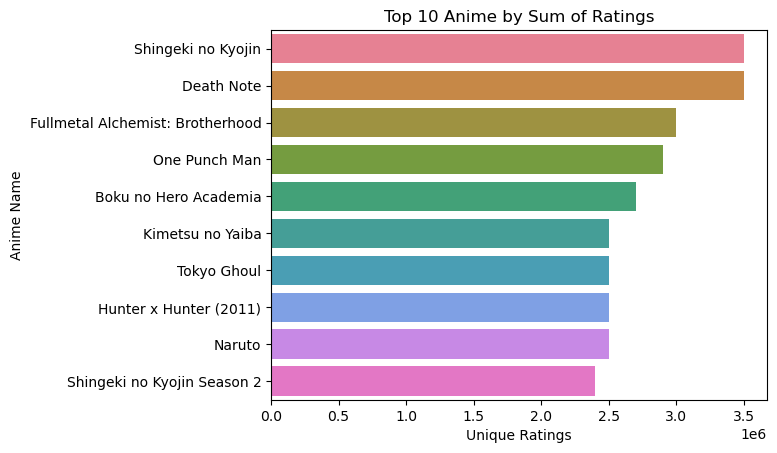

In [34]:
# Plot top 10 anime berdasarkan popularitas(jumlah rating)

# Membuat grafik bar horizontal
sns.barplot(x=top10_anime.values, y=top10_anime.index, palette="husl")

# set label dan titel
plt.title('Top 10 Anime by Sum of Ratings')
plt.xlabel('Unique Ratings')
plt.ylabel('Anime Name')

# menunjukan plot
plt.show()

Berdasarkan popularitasnya yang digambarkan dengan jumlah rating, anime `Shingeki no Kyojin` dan `Death Note` menempati peringkat teratas dengan jumlah rating 3500000. Sebagian besar anime yang tercantum pada grafik diatas menunjukan karakteristik yang mirip, yaitu target demografi `shounen` dan memiliki tag `action`.

In [35]:
# Melihat top 10 Anime berdasarkan besaran rating
top10_rated_anime = anime.groupby(['name'])['rating'].mean().sort_values(ascending=False).head(10)
top10_rated_anime

name
Fullmetal Alchemist: Brotherhood              9.13
Kaguya-sama wa Kokurasetai: Ultra Romantic    9.12
Gintama°                                      9.08
Shingeki no Kyojin Season 3 Part 2            9.07
Gintama'                                      9.05
Hunter x Hunter (2011)                        9.04
Gintama': Enchousen                           9.04
Fruits Basket: The Final                      9.03
Gintama.                                      8.99
3-gatsu no Lion 2nd Season                    8.95
Name: rating, dtype: float64

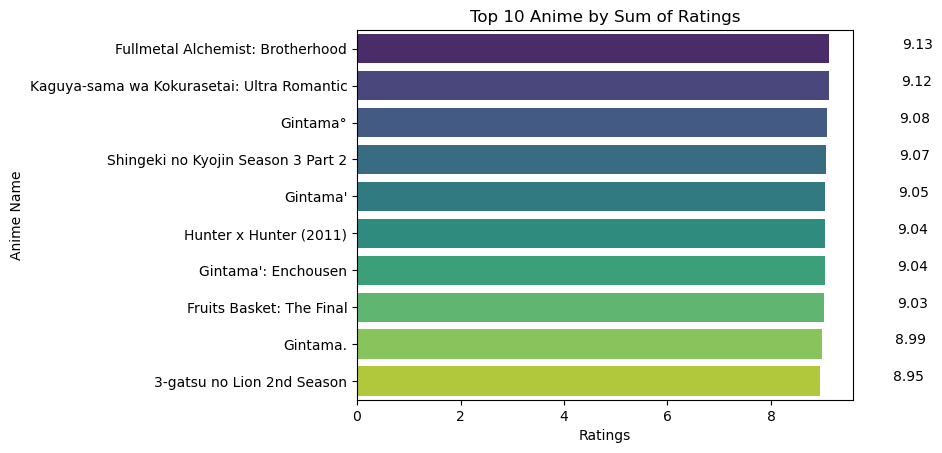

In [36]:
# Plot top 10 anime berdasarkan popularitas(jumlah rating)

# Membuat grafik bar horizontal
ax = sns.barplot(x=top10_rated_anime.values, y=top10_rated_anime.index, palette="viridis")

# set label dan titel
plt.title('Top 10 Anime by Sum of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Anime Name')

# Menunjukan nilai rating pada plot
for i, v in enumerate(top10_rated_anime.values):
    ax.text(v + 2 , i, str(v), color='black', ha='right')

# menunjukan plot
plt.show()

Jika ditinjau berdasarkan tingkat nilai rating hasil top 10 anime sangat berbeda. sebelumnya target demografi didominasi `shounen` dan sekarang terdapat judul anime dengan target demografi `shoujo`, dan `seinen`. Selain itu anime dengan tag `Comedy` juga ikut masuk dalam list ini.

Berdasarkan status tayang kita juga dapat melihat top anime yang paling diantisipasi.

In [37]:
# query anime yang belum tayang
not_aired = anime.query("status == 'Not Aired'")
# Melihat top 10 anticipated anime
anticipated_anime = not_aired.groupby(['name'])['rated_by'].sum().sort_values(ascending=False).head(10)
anticipated_anime

name
Chainsaw Man                                           482000
Boku no Hero Academia 6th Season                       211000
Spy x Family Part 2                                    198000
Shingeki no Kyojin: The Final Season - Kanketsu-hen    178000
Bleach: Sennen Kessen-hen                              147000
Vinland Saga Season 2                                  133000
Dr. Stone: New World                                   127000
Fumetsu no Anata e 2nd Season                          121000
Kimetsu no Yaiba: Katanakaji no Sato-hen               103000
Tonikaku Kawaii 2nd Season                              98000
Name: rated_by, dtype: Int64

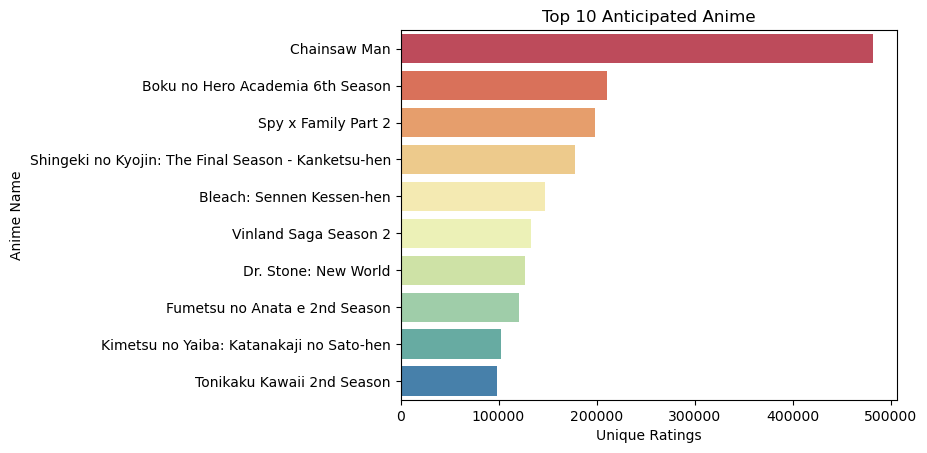

In [38]:
# Plot top 10 anime berdasarkan popularitas(jumlah rating)

# Membuat grafik bar horizontal
sns.barplot(x=anticipated_anime.values, y=anticipated_anime.index, palette="Spectral")

# set label dan titel
plt.title('Top 10 Anticipated Anime')
plt.xlabel('Unique Ratings')
plt.ylabel('Anime Name')

# menunjukan plot
plt.show()

Anime `Chainsaw Man` merupakan anime yang paling diantisipasi. 

## 3. Peringkat Studio Teratas

Peringkat studio juga perlu dianalisis untuk mengetahui studio penghasil anime terbaik dan terbanyak.

In [39]:
# Melihat top 10 studio berdasarkan popularitas(jumlah rating)
top10_studio = anime.groupby(['studio'])['rated_by'].sum().sort_values(ascending=False).head(10)
top10_studio

studio
Bones                26162000
Madhouse             24832000
A-1 Pictures         22934000
Pierrot              19350000
J.C.Staff            15622000
Wit Studio           14105000
Production I.G       13344000
Toei Animation       12000000
MAPPA                11604000
TMS Entertainment     9977000
Name: rated_by, dtype: Int64

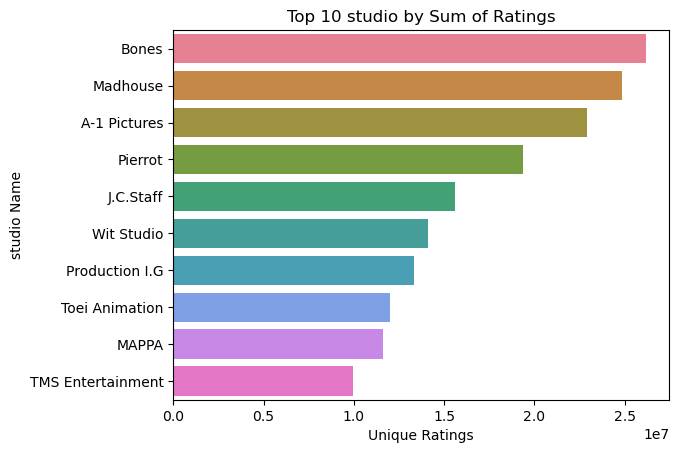

In [40]:
# Plot top 10 studio berdasarkan popularitas(jumlah rating)

# Membuat grafik bar horizontal
sns.barplot(x=top10_studio.values, y=top10_studio.index, palette="husl")

# set label dan titel
plt.title('Top 10 studio by Sum of Ratings')
plt.xlabel('Unique Ratings')
plt.ylabel('studio Name')

# menunjukan plot
plt.show()

Studio-studio yang ditampilkan pada tabel dan grafik diatas adalah studio yang menghasilkan anime paling populer (berdasarkan jumlah rating). Studio `Bones`, `Madhouse`, dan `A-1 Pictures` menghasilkan anime dengan rating terbanyak dimana masing-masing sudah mengakumulasi lebih dari 20 juta rating.

Studio dengan jumlah anime terbanyak kemudian dilihat.

In [41]:
# Melihat top 10 studio berdasarkan jumlah anime yang diproduksi
top10_produce_studio = anime.groupby(['studio'])['name'].count().sort_values(ascending=False).head(10)
top10_produce_studio

studio
Toei Animation       86
Madhouse             68
J.C.Staff            62
Studio Deen          61
TMS Entertainment    45
Pierrot              45
A-1 Pictures         36
OLM                  36
Bones                30
Production I.G       28
Name: name, dtype: int64

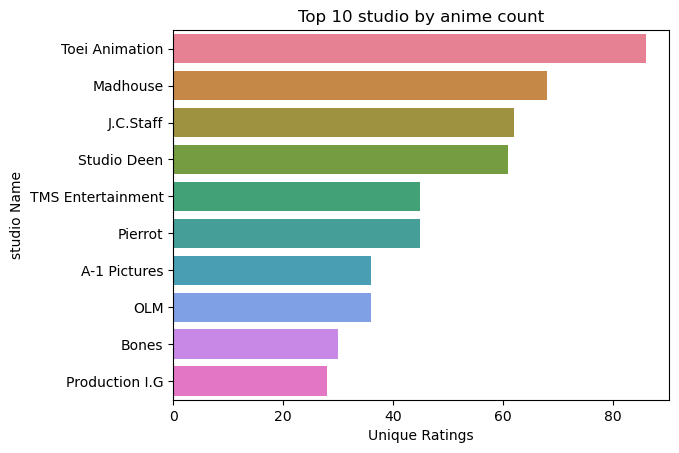

In [42]:
# Plot top 10 studio berdasarkan jumlah anime yang diproduksi

# Membuat grafik bar horizontal
sns.barplot(x=top10_produce_studio.values, y=top10_produce_studio.index, palette="husl")

# set label dan titel
plt.title('Top 10 studio by anime count')
plt.xlabel('Unique Ratings')
plt.ylabel('studio Name')

# menunjukan plot
plt.show()

Toei animation merupakan studio yang menghasilkan anime terbanyak. Toei animation sudah berdiri sejak tahun 1948 dan telah mencetak banyak sekali anime populer, diantaranya Dragon Ball dan One Piece.

## 4. Tema dan tag anime populer

Pada bagian ini dilihat apa tema dan tag yang paling banyak jumlah animenya.

Dalam satu anime bisa memiliki lebih dari satu tema dan tag, maka untuk melihat satu-satu data tersebut sebelumnya dilakukan split menjadi value yang berbeda.

In [43]:
# Split data tema
themes = pd.Series(data= anime['theme'], dtype="string").str.split(", ",expand=True)
themes

,0,1,2,3,4
0,Gore,Military,Survival,<NA>,<NA>
1,Psychological,<NA>,<NA>,<NA>,<NA>
2,Military,<NA>,<NA>,<NA>,<NA>
3,School,Super Power,<NA>,<NA>,<NA>
4,Martial Arts,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...
1689,Strategy Game,<NA>,<NA>,<NA>,<NA>
1690,Kids,<NA>,<NA>,<NA>,<NA>
1691,Kids,<NA>,<NA>,<NA>,<NA>
1692,Historical,<NA>,<NA>,<NA>,<NA>


Bisa dilihat dalam satu anime bisa terdapat sampai 4 tema.

In [44]:
# Menghitung jumlah value tema
themes_count = pd.DataFrame(data=np.reshape(themes.to_numpy(),themes.size)).dropna().value_counts()
themes_count.head(20)

School           314
Shounen          145
Historical       103
Mythology         82
Super Power       77
Mecha             60
Team Sports       56
Psychological     56
Harem             56
Iyashikei         53
Adult Cast        50
Military          45
Seinen            43
Music             42
Martial Arts      41
Gag Humor         39
Strategy Game     39
Shoujo            35
Mahou Shoujo      34
Gore              33
dtype: int64

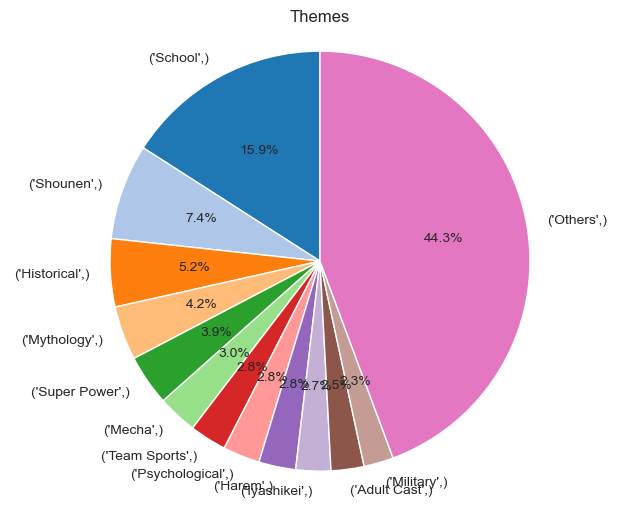

In [45]:
# Ekstrak tema teratas dan kelompokkan sisanya sebagai "others"
top_12_themes = themes_count.head(12)
others_count = themes_count.iloc[12:].sum()
top_12_themes['Others'] = others_count

# Membuat canvas pie chart
plt.figure(figsize=(8, 6))
colors = sns.color_palette("tab20") 
sns.set_style("whitegrid")

# Membuat pie chart
plt.pie(
    top_12_themes.values, 
    labels=top_12_themes.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Themes")
plt.axis('equal')
plt.show()

Dapat dilihat anime dengan tema kehidupan sekolah `School` paling populer diantara yang lain. Diikuti dengan `Shounen`, `Historical`, `Mythology`, dan `Super Power` yang menempati 5 tema teratas.

Dilakukan hal yang sama dengan tema untuk variabel tags.

In [46]:
# Split data tags
split_tags = pd.Series(data=anime['tags'],dtype='string').str.split(', ', expand=True)
split_tags

,0,1,2,3,4,5,6,7
0,Action,Drama,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,Supernatural,Suspense,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,Action,Adventure,Drama,Fantasy,<NA>,<NA>,<NA>,<NA>
3,Action,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,Action,Adventure,Fantasy,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...
1689,Adventure,Fantasy,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1690,Action,Adventure,Sci-Fi,Sports,<NA>,<NA>,<NA>,<NA>
1691,Comedy,Gourmet,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1692,Supernatural,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [47]:
# Menghitung jumlah value tags
tags_count = pd.DataFrame(data=np.reshape(split_tags.to_numpy(),split_tags.size)).dropna().value_counts()
tags_count.head(20)

Comedy          634
Action          450
Romance         310
Drama           309
Fantasy         298
Adventure       271
Supernatural    237
Slice           194
Life            194
of              194
Sci-Fi          177
Sports          106
Mystery          99
Ecchi            97
Horror           38
Gourmet          26
Suspense         22
Love             18
Girls            12
None             12
dtype: int64

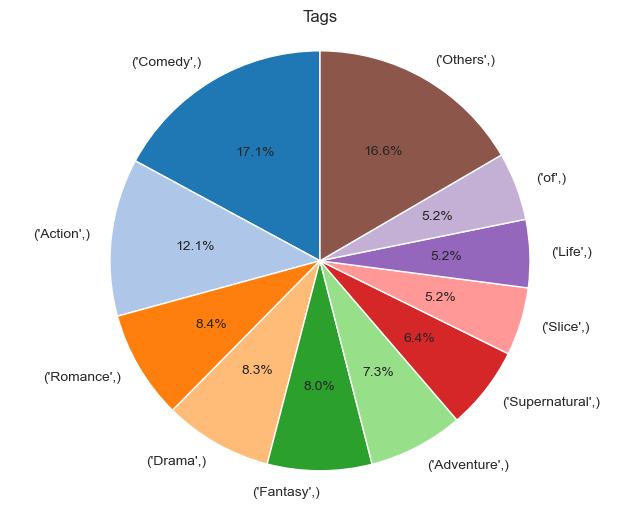

In [48]:
# Ekstrak 10 tags teratas dan kelompokkan sisanya sebagai "others"
top_tags = tags_count.head(10)
others_count = tags_count.iloc[10:].sum()
top_tags['Others'] = others_count

# Membuat canvas pie chart
plt.figure(figsize=(8, 6))
colors = sns.color_palette("tab20") 
sns.set_style("whitegrid")

# Membuat pie chart
plt.pie(
    top_tags.values, 
    labels=top_tags.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Tags")
plt.axis('equal')
plt.show()

Tag dengan jumlah anime terbanyak adalah Comedy, salah satu anime dengan tag comedy terpopuler adalah gintama. Tag terpopuler selanjutanya diikuti oleh action, romance, darama, dan fantasy.

Setelah mengetahui tema dan tag yang populer, kemuudian dilihat target audiens dari anime-anime yang ada.

## 5. Central Tendency untuk setiap demografi

Pada bagian ini target audiens ditinjau

In [49]:
# Melihat values demografi
anime['demographic'].unique()

array(['Shounen', 'Seinen', 'Shoujo', 'Josei', 'Kids'], dtype=object)

Demografi dalam anime dibagi menjadi 5 yaitu :
- Shounen   : target audiens laki-laki muda
- Seinen    : target audiens dewasa
- Shoujo    : target audiens perempuan muda
- Josei     : target audiens perempuan dewasa
- Kids      : target audiens anak-anak

Kelima demografi tersebut akan dilihat central tendency-nya (mean, median, modus) terhadap variabel ratings, popularitas (berdasarkan rated_by), durasi, dan jumlah episode.

In [50]:
# Demografi dengan anime terbanyak
anime['demographic'].mode()

0    Shounen
Name: demographic, dtype: object

In [51]:
# rata-rata rating anime tiap demografi
rating_mean = anime[['demographic', 'rating']].groupby('demographic').mean()

In [52]:
# rata-rata popularitas anime tiap demografi
popularity_mean = anime[['demographic', 'rated_by']].groupby('demographic').mean()

In [53]:
# rata-rata jumlah episode anime tiap demografi
eps_mean = anime[['demographic', 'eps']].groupby('demographic').mean()

Anime dengan target demografi shounen memiliki rating terbesar, dan jumlah rating terbanyak diantara yang lainnya. Sedangkan anime untuk Kids memiliki jumlah episode terbanyak.

Text(0.5, 1.0, 'Ratings for Kids Anime')

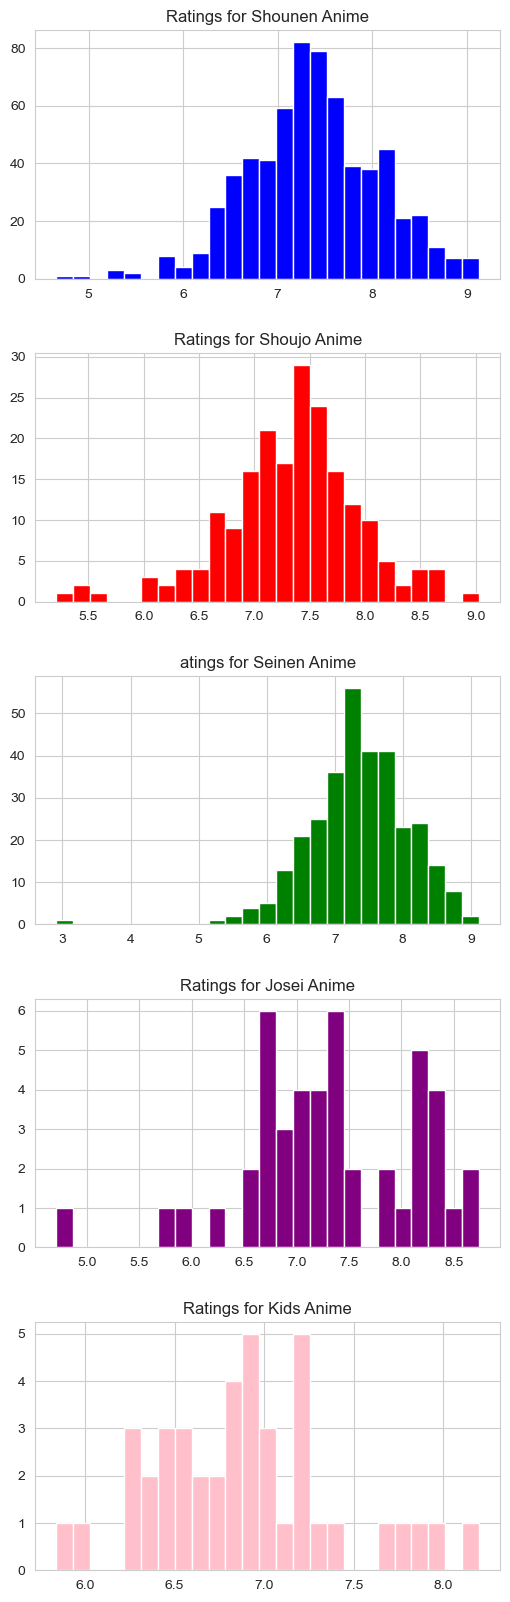

In [54]:
fig, axes = plt.subplots(nrows=5, figsize=(6, 20))

anime[anime['demographic'] == 'Shounen'].hist('rating', ax=axes[0], bins=25, color='blue')
axes[0].set_title('Ratings for Shounen Anime')
anime[anime['demographic'] == 'Shoujo'].hist('rating', ax=axes[1], bins=25, color='red')
axes[1].set_title('Ratings for Shoujo Anime')
anime[anime['demographic'] == 'Seinen'].hist('rating', ax=axes[2], bins=25, color='green')
axes[2].set_title('atings for Seinen Anime')
anime[anime['demographic'] == 'Josei'].hist('rating', ax=axes[3], bins=25, color='purple')
axes[3].set_title('Ratings for Josei Anime')
anime[anime['demographic'] == 'Kids'].hist('rating', ax=axes[4], bins=25, color='pink')
axes[4].set_title('Ratings for Kids Anime')

Grafik diatas menunjukan sebaran data rating dari kelima demografi. dapat divisualisasikan nilai tengah dari grafik tersebut

In [55]:
# statistik deskriptif data numerik dari tabel anime
anime.describe()

,rating,year,eps,eps_avg_duration_in_min,rated_by
count,1248.000000,1248.0,1248.000000,1248.000000,1248.0
mean,7.346074,2010.289263,31.060897,22.503205,251625.0
std,0.690458,9.158087,62.872597,4.643160,417358.419252
min,2.910000,1963.0,3.000000,1.000000,10000.0
25%,6.930000,2005.0,12.000000,23.000000,33000.0
50%,7.350000,2012.0,13.000000,24.000000,99000.0
75%,7.780000,2017.0,26.000000,24.000000,268000.0
max,9.130000,2023.0,1787.000000,46.000000,3500000.0


Diatas adalah statistik deskriptif dari keseluruhan data anime.

## 6. Uji Hipotesis perbandingan rata-rata rating untuk setiap demografi dengan ANOVA

Rata-rata rating antara tiap demografi akan dibandingkan menggunakan uji one-way ANOVA (Analysis of Variance). Hipotesis nol (H0) dalam kasus ini adalah rata-rata rating sama pada semua demografi, dan hipotesis alternatif (H1) adalah bahwa setidaknya salah satu rata-rata berbeda.

In [56]:
# Nilai signivicance level
alpha = 0.05

# Filter data yang ingin diuji
demografi = ['Shounen', 'Seinen', 'Shoujo', 'Josei', 'Kids']
data_anova = [anime[anime['demographic'] == i]['rating'] for i in demografi]

# Uji one-way ANOVA
f_statistic, p_value = stats.f_oneway(*data_anova)

# hipothesis 0 (H0): mean pada kelima demografi sama
# hipotesis alternatif (H1): setidaknya salah satu mean berbeda

# Periksa p-value apakah lebih dari alpha
if p_value < alpha:
    print("Reject H0: At least one rating is significantly different.")
else:
    print("Fail to reject H0: There's not enough proof that the rating is significantly different.")

# Tampilkan nilai F-statistic dan p-value
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Demography: {', '.join(demografi)}")

Reject H0: At least one rating is significantly different.
F-statistic: 4.66
P-value: 0.0010
Demography: Shounen, Seinen, Shoujo, Josei, Kids


Hasil menunjukan nilai `p-value` kurang dari `0.05` yang berarti kita dapat menolak Hipotesis null. Maka dapat disimpulkan setidaknya ada salah satu rating yang berbeda secara signifikan dari yang lain.

Cara termudah untuk memvisualisasikan hasil dari ANOVA adalah dengan menggunakan grafik sederhana yang menunjukkan semua titik individu. Pada kasus ini dapat digunakan violin plot.

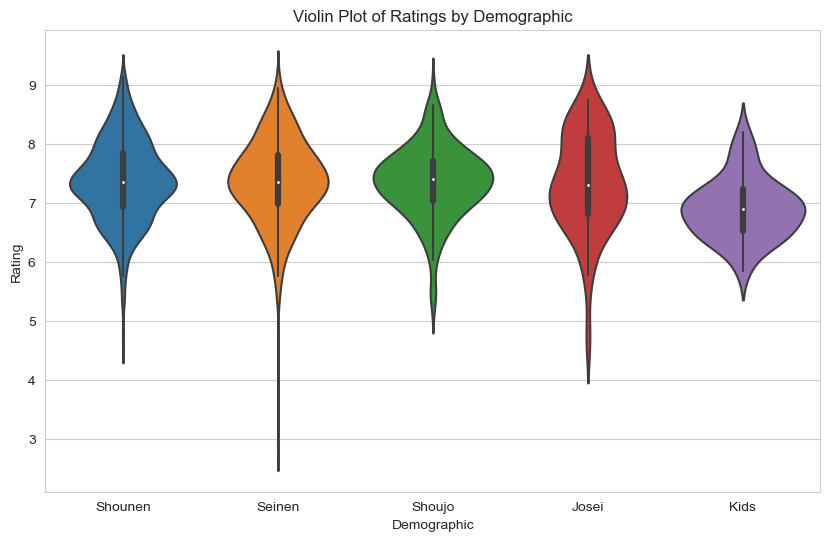

In [57]:
# Create a violin plot to visualize the ratings by demographic
plt.figure(figsize=(10, 6))
sns.violinplot(x='demographic', y='rating', data=anime)
plt.title('Violin Plot of Ratings by Demographic')
plt.xlabel('Demographic')
plt.ylabel('Rating')
plt.show()

Dari violin plot dapat dilihat bahwa data rating dari demografi josei dan kids berbeda dari yang lain.

---

# 6. Pengambilan Kesimpulan

Berdasarkan analisis data anime yang telah dilakukan, dapat diambil beberapa kesimpulan:

- Popularitas anime terus meningkat sepanjang tahun, sehingga anime memiliki potensi untuk meningkatkan jumlah subscriber di platform streaming Marinobar.

- Berdasarkan analisis EDA, ditemukan bahwa anime dengan demografi "Shounen" memiliki jumlah rating yang cukup tinggi, sedangkan demografi "Josei" memiliki jumlah rating yang relatif lebih rendah.

- Ditemukan juga studio-studio yang paling banyak menghasilkan anime populer dan berkualitas. Informasi ini dapat digunakan untuk mengantisipasi anime dari studio tersebut untuk ditayangkan dalam platform marinobar.

- Tema yang paling populer adalah `School`, `Shounen`, `Historical`, `Mythology`, dan `Super Power`. Tag yang paling populer adalah `comedy`, `action`, `romance`, `darama`, dan `fantasy`. tema dan tag tersebut banyak dikonsumsi oleh laki-laki muda (shounen).

- Anime dengan target demografi shounen memiliki rating terbesar, dan jumlah rating terbanyak diantara yang lainnya. Sedangkan anime untuk Kids memiliki jumlah episode terbanyak.

- Hasil uji one-way ANOVA menunjukkan bahwa terdapat perbedaan yang signifikan dalam rata-rata rating antara demografi anime "Shounen", "Seinen", "Shoujo", "Josei", dan "Kids". Hal ini dapat menjadi informasi penting dalam memilih anime apa yang cocok untuk ditayangkan di platform Marinobar.

- Dalam visualisasi menggunakan violin plot, dapat dilihat distribusi rating anime berdasarkan demografi dengan lebih detail. Violin plot menunjukkan keragaman dalam distribusi rating antara demografi anime, dengan lebar violin yang mengindikasikan densitas rating pada nilai-nilai tertentu.

Berdasarkan kesimpulan tersebut, sebagai Data Analyst, dapat direkomendasikan untuk lebih fokus dalam menayangkan anime dengan demografi "Shounen" yang memiliki jumlah rating yang cukup tinggi, serta mempertimbangkan untuk meningkatkan konten anime dengan demografi "Shoujo" yang juga memiliki anime dengan rating tinggi. Selain itu, lihat juga studio produksi anime yang berpotensi menghasilkan anime yang populer, diantaranya `Bones`, `Madhouse`, `A-1 Pictures`, dan `Toei Animation`.

---